## Homework 5 (A prerequisite for Project)

In your project, you are expected to evaluate alternative trading strategies (i.e. algorithmic trading). "Algorithmic or Quantitative trading is the process of designing and developing trading strategies based on mathematical and statistical analyses" ([source](https://www.freecodecamp.org/news/algorithmic-trading-in-python/)). This requires a connection to a data source and this homework is related to setting up the required connections and some simple data manipulation steps. 


### Task 1
This task requires to set up a free account for Quandl API [https://docs.data.nasdaq.com/](https://docs.data.nasdaq.com/). This [link](https://docs.data.nasdaq.com/docs/python-installation) provides the details about installation of the quandl module and setting up authentication details to get relevant information.

- Install quandl using command window (or web interface will also work fine if you use Anaconda Navigator) <br> 
pip install quandl
- Check if it is installed by importing the module as below. If there is no error, you are good to go.

In [161]:
pip install quandl

  Using cached Quandl-3.7.0-py2.py3-none-any.whl (26 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
  Using cached pandas-1.3.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached numpy-1.22.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached more_itertools-8.12.0-py3-none-any.whl (54 kB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached charset_normalizer-2.0.10-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [162]:
import quandl

- Create an account if you do not have any from the [link](https://data.nasdaq.com/sign-up). Signing-up as "academic" is suggested.
- You will receive your API key once you complete your registration. 
- If you already have an account, you can find your API key from your account details.
- We will import pandas and quandl modules to check if everything works. 
- Set your API key (i.e. register within Python)
- Send a sample data request.

In [163]:
import pandas as pd
import quandl as q
# set the API key
q.ApiConfig.api_key = "zXJUzSeRdybmhZU4Zn-e"

#send a get request to query Tesla's end of day stock prices from 1st #Jan, 2010 to 1st Jan, 2019
tesla_data = q.get("WIKI/TSLA", start_date="2010-01-01", end_date="2018-01-01")

# check the first 5 rows of the dataframe
tesla_data.head()

Open     High    Low  Close      Volume  Ex-Dividend  \
Date                                                                
2010-06-29  19.00  25.0000  17.54  23.89  18766300.0          0.0   
2010-06-30  25.79  30.4192  23.30  23.83  17187100.0          0.0   
2010-07-01  25.00  25.9200  20.27  21.96   8218800.0          0.0   
2010-07-02  23.00  23.1000  18.71  19.20   5139800.0          0.0   
2010-07-06  20.00  20.0000  15.83  16.11   6866900.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2010-06-29          1.0      19.00    25.0000     17.54       23.89   
2010-06-30          1.0      25.79    30.4192     23.30       23.83   
2010-07-01          1.0      25.00    25.9200     20.27       21.96   
2010-07-02          1.0      23.00    23.1000     18.71       19.20   
2010-07-06          1.0      20.00    20.0000     15.83       16.11   

            Adj. Volume  
Date                     
2010-06-29   18766300.0  
2010-06-30   17187100.0  
2010-07-01    8218800.0  
2010-07-02    5139800.0  
2010-07-06    6866900.0

Note that get method requires certain arguments in some form. The details of the call is provided [here](https://docs.data.nasdaq.com/docs/parameters-2#section-times-series-parameters). We made a request to TESLA's daily prices between two dates by "WIKI/TSLA". WIKI is a data product code. The details on the data organization is provided [here](https://docs.data.nasdaq.com/docs/data-organization). Some of the products are free as you can see from the link. We have used "WIKI" free product which is "End of Day US Stock Prices" to get TESLA prices. There are some other prices/indices that are available for free. You can check those in you are interested.

Once you have obtained the information in a pandas dataframe, this task is completed.

### Task 2

Implement a function that calculates simple moving average (SMA) of closing prices. Note that simple moving average calculates the average of the values in the most recent past $k$ periods (day in our case). Therefore the function will take an argument "number of periods". Technical analysis people like to use such statistics in order to make trading decisions. You can find [this link](https://www.profitaddaweb.com/2017/07/smasimple-moving-average-technical.html) useful.

Date
2017-01-03           NaN
2017-01-04           NaN
2017-01-05           NaN
2017-01-06           NaN
2017-01-09           NaN
                 ...    
2017-12-22    327.817857
2017-12-26    328.788571
2017-12-27    328.672857
2017-12-28    328.967143
2017-12-29    328.697143
Name: SMA, Length: 250, dtype: float64


<AxesSubplot:title={'center':'SMA'}, xlabel='Date', ylabel='14 DAYS MOVING AVERAGE'>

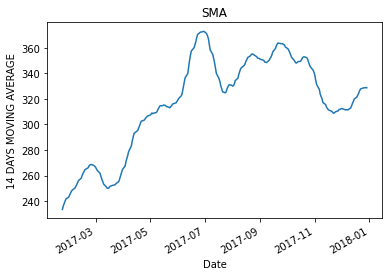

In [164]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

auth_token="zXJUzSeRdybmhZU4Zn-e"

def SMA(data,ndays):
    SMA=pd.Series((data['Close']).rolling(n).mean(),name='SMA')
    data=data.join(SMA)
    return data

data=quandl.get("WIKI/TSLA", start_date="2017-01-01", end_date="2017-12-31")
data=pd.DataFrame(data)

n=14
SMG=SMA(data,n)
SMA=SMG['SMA']

plt.title('SMA')
plt.xlabel('DATE')
plt.ylabel('14 DAYS MOVING AVERAGE')

print(SMA)
SMA.plot()

### Task 3

Implement a function that calculates simple moving standard deviation of closing prices so that one can have some understanding of the volatility in the prices. 

Date
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
2017-01-09          NaN
                ...    
2017-12-22    12.261760
2017-12-26    11.886691
2017-12-27    11.951737
2017-12-28    11.806393
2017-12-29    11.805176
Name: SMSD, Length: 250, dtype: float64


<AxesSubplot:title={'center':'SMSD'}, xlabel='Date', ylabel='MONTHLY MOVING STANDART DEVIATION'>

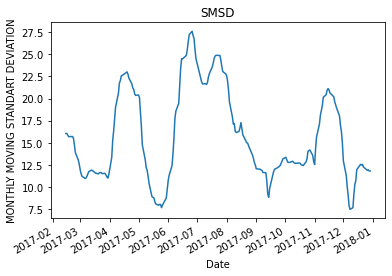

In [165]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

auth_token="zXJUzSeRdybmhZU4Zn-e"

def SMSD(data,ndays):
    SMSD=pd.Series((data['Close']).rolling(n).std(),name='SMSD')
    data=data.join(SMSD)
    return data

data=quandl.get("WIKI/TSLA", start_date="2017-01-01", end_date="2017-12-31")
data=pd.DataFrame(data)

n=30
SMG=SMSD(data,n)
SMSD=SMG['SMSD']

print(SMSD)

plt.title('SMSD')
plt.xlabel('DATE')
plt.ylabel('MONTHLY MOVING STANDART DEVIATION')


SMSD.plot()

### Task 4

Assume that you are asked to devise a simple trading strategy which takes moving standard deviation and average into account. As an example, you may end up with such a strategy:

- If moving standard deviation is larger than some number, do nothing (this is kind of a risk averse setting)
- If last price observed is larger than the average, buy the stock, sell otherwise.

This is just a very simple example based on the moving statistics of the closing prices. You may end up with a better strategy. In order to understand if the strategy is reasonable, we generally try to see the performance of the trading algorithm using a predefined past period. This is so called backtesting. This will be done in a paper-trading setting. A paper trade is a simulated trade that allows an investor to practice buying and selling without risking real money. Note that paper trading may not be representative of the real trade because of the market dynamics.

Here we will assume that you have 1 unit of money allowed for trading each day. You can invest or keep it. If you pass investing on a day (because of some rule you use like in the volatility example above), it is assumed that you lost the opportunity (in other words, the money to be invested is not accumulated for the use on the next day).

Implement a trading strategy based on the statistics and evaluate the strategy for the year 2017 on the Tesla prices. You need to keep track of the everyday actions in a pandas dataframe then report the invested money and total value of your investment at the end of the year. Report relevant statistics (be creative here).

In [166]:
import pandas as pd
import quandl as q
import numpy as np

q.ApiConfig.api_key = "zXJUzSeRdybmhZU4Zn-e"

tesla_data = q.get("WIKI/TSLA", start_date="2016-01-01", end_date="2018-01-01")


def SMA(n):
    return tesla_data[["Close"]].rolling(n).mean()

def SMSTD(n):
    return tesla_data[["Close"]].rolling(n).std()



n = 10                                             
SMA_n = SMA(n)                                    
SMSTD_n = SMSTD(n)                              
tesla = tesla_data[["Close"]].copy()               
tesla["SMA"] = SMA_n.round(2)                   
tesla["SMSTD"] = SMSTD_n.round(2)
tesla = tesla.loc[tesla.index >= "2017-01-01"]  
tesla["Close_t-1"] =tesla["Close"].shift(1)

tesla["Return%"]=(np.log(tesla["Close"]/tesla["Close_t-1"])*100).round(2)

def RSMA(x):
    return tesla[["Return%"]].rolling(x).mean() # Moving average of Returns weekly 
x = 5
RSMA_n= RSMA(x)
tesla["RSMA"]=RSMA(x).round(2)


tesla.head(10)

Close     SMA  SMSTD  Close_t-1  Return%  RSMA
Date                                                       
2017-01-03  216.99  212.56   5.55        NaN      NaN   NaN
2017-01-04  226.99  214.99   6.06     216.99     4.51   NaN
2017-01-05  226.75  216.79   6.65     226.99    -0.11   NaN
2017-01-06  229.01  218.92   6.82     226.75     0.99   NaN
2017-01-09  231.28  221.20   6.75     229.01     0.99   NaN
2017-01-10  229.87  222.85   6.64     231.28    -0.61  1.15
2017-01-11  229.73  223.87   6.85     229.87    -0.06  0.24
2017-01-12  229.59  224.86   6.90     229.73    -0.06  0.25
2017-01-13  237.75  227.17   6.97     229.59     3.49  0.75
2017-01-17  235.58  229.35   5.57     237.75    -0.92  0.37

In [167]:
SMA_MEAN = np.mean(tesla["SMA"]).round(2)
print('SMA Average is:'+ str(SMA_MEAN))
SMSTD_MEAN = np.mean(tesla["SMSTD"]).round(2)
print('SMSTD Average is:'+ str(SMSTD_MEAN))
RT_MEAN = np.mean(tesla["Return%"]).round(2)
print('Return Average is:'+ str(RT_MEAN))
RT_TOTAL = np.sum(tesla["Return%"]).round(2)
print('Return total is:'+ str(RT_TOTAL))
RT_TOTAL_sd = np.std(tesla["Return%"]).round(2)
print('Return StDEV is: '+ str(RT_TOTAL_sd))
MAX_SMA = np.max(tesla["SMA"]).round(2)
MIN_SMA = np.min(tesla["SMA"]).round(2)
print('SMA is between '+ str(MIN_SMA)+ ' and ' +str(MAX_SMA))
MAX_SMSTD = np.max(tesla["SMSTD"]).round(2)
MIN_SMSTD = np.min(tesla["SMSTD"]).round(2)
print('SMSTD is between '+ str(MIN_SMSTD)+ ' and ' +str(MAX_SMSTD))
MAX_RT = np.max(tesla["Return%"]).round(2)
MIN_RT = np.min(tesla["Return%"]).round(2)
print('Return is between '+ str(MIN_RT)+ ' and ' +str(MAX_RT)+ ' (+/-)' + (str(RT_TOTAL_sd)))

SMA Average is:312.47
SMSTD Average is:9.03
Return Average is:0.14
Return total is:36.04
Return StDEV is: 2.23
SMA is between 212.56 and 376.53
SMSTD is between 1.93 and 26.39
Return is between -7.52 and 7.01 (+/-)2.23


In [168]:
# INVESTMENT DECISION
# let say close price must be slightly more than 0.96 of 2 week moving average 
invest = (tesla["SMA"]*0.96 <= tesla["Close"])  
invest = invest.astype(int)   
tesla["invest"]= invest
# let say last week return average must be positive or 0
invest_2=(tesla["RSMA"] >= 0)
invest_2= invest_2.astype(int)   
tesla["invest_2"]= invest_2
tesla = tesla.ffill(axis = 0)                     
tesla["invest_2"] = tesla["invest_2"].diff() 


tesla.head()

Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2
Date                                                                         
2017-01-03  216.99  212.56   5.55        NaN      NaN   NaN       1       NaN
2017-01-04  226.99  214.99   6.06     216.99     4.51   NaN       1       0.0
2017-01-05  226.75  216.79   6.65     226.99    -0.11   NaN       1       0.0
2017-01-06  229.01  218.92   6.82     226.75     0.99   NaN       1       0.0
2017-01-09  231.28  221.20   6.75     229.01     0.99   NaN       1       0.0

In [169]:
tesla.iloc[0,-1] = (tesla.iloc[0]["invest_2"] < tesla.iloc[0]["Close"]).astype(int)
tesla.head()



Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2
Date                                                                         
2017-01-03  216.99  212.56   5.55        NaN      NaN   NaN       1       0.0
2017-01-04  226.99  214.99   6.06     216.99     4.51   NaN       1       0.0
2017-01-05  226.75  216.79   6.65     226.99    -0.11   NaN       1       0.0
2017-01-06  229.01  218.92   6.82     226.75     0.99   NaN       1       0.0
2017-01-09  231.28  221.20   6.75     229.01     0.99   NaN       1       0.0

In [170]:
# two strategy has been created, final decision will be multplying them so that if 0 result will be 0
# if one of them is 1 other is -1 then final decision will be -1
tesla["Final_Dec"] = tesla["invest"] * tesla["invest_2"] 
tesla.head()


Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2  \
Date                                                                            
2017-01-03  216.99  212.56   5.55        NaN      NaN   NaN       1       0.0   
2017-01-04  226.99  214.99   6.06     216.99     4.51   NaN       1       0.0   
2017-01-05  226.75  216.79   6.65     226.99    -0.11   NaN       1       0.0   
2017-01-06  229.01  218.92   6.82     226.75     0.99   NaN       1       0.0   
2017-01-09  231.28  221.20   6.75     229.01     0.99   NaN       1       0.0   

            Final_Dec  
Date                   
2017-01-03        0.0  
2017-01-04        0.0  
2017-01-05        0.0  
2017-01-06        0.0  
2017-01-09        0.0

In [171]:


tesla2 = tesla[tesla["Final_Dec"] != 0].copy()      
tesla2.head(5)

Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2  \
Date                                                                            
2017-01-10  229.87  222.85   6.64     231.28    -0.61  1.15       1       1.0   
2017-01-31  251.93  249.29   5.36     250.63     0.52 -0.21       1      -1.0   
2017-02-06  257.77  252.70   2.42     251.33     2.53  0.56       1       1.0   
2017-02-16  268.95  267.74  10.52     279.76    -3.94 -0.02       1      -1.0   
2017-02-17  272.23  269.83   8.85     268.95     1.21  0.22       1       1.0   

            Final_Dec  
Date                   
2017-01-10        1.0  
2017-01-31       -1.0  
2017-02-06        1.0  
2017-02-16       -1.0  
2017-02-17        1.0

In [172]:
tesla2["RetStr"] = tesla2["Close"].pct_change()
tesla2.loc[tesla2.Final_Dec == 1, "RetStr"] = np.nan
tesla2.head(5)    

Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2  \
Date                                                                            
2017-01-10  229.87  222.85   6.64     231.28    -0.61  1.15       1       1.0   
2017-01-31  251.93  249.29   5.36     250.63     0.52 -0.21       1      -1.0   
2017-02-06  257.77  252.70   2.42     251.33     2.53  0.56       1       1.0   
2017-02-16  268.95  267.74  10.52     279.76    -3.94 -0.02       1      -1.0   
2017-02-17  272.23  269.83   8.85     268.95     1.21  0.22       1       1.0   

            Final_Dec    RetStr  
Date                             
2017-01-10        1.0       NaN  
2017-01-31       -1.0  0.095967  
2017-02-06        1.0       NaN  
2017-02-16       -1.0  0.043372  
2017-02-17        1.0       NaN

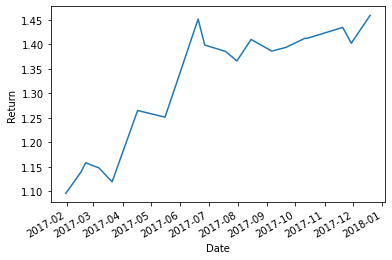

In [173]:
(tesla2["RetStr"].dropna().cumsum()+1).plot()
plt.ylabel("Return")
plt.show()

In [174]:
SumRet=np.sum(tesla2["RetStr"]).round(2)
print('w/Investment Strategy, in 1 year, 1 TL becomes:' + str(SumRet+1))


w/Investment Strategy, in 1 year, 1 TL becomes:1.46


In [175]:
SumRet_0=np.sum(tesla["Return%"]/100).round(2)
print('w/out Investment Strategy, in 1 year, 1 TL becomes:' + str(SumRet_0+1))

w/out Investment Strategy, in 1 year, 1 TL becomes:1.3599999999999999


### Task 5

One important baseline strategy that is commonly used in trading algorithm evaluation is buy and hold strategy. Assume that you have invested 1 unit of money every day (in the form of a "buy" decision) and hold it. What is the final status of your investment. Compare with your proposed strategy.

In [176]:
tesla3 = tesla[tesla["Final_Dec"] != -1].copy()   
tesla3["buyholdret"] = tesla2["Return%"]*tesla["Final_Dec"] 
tesla3.head()

Close     SMA  SMSTD  Close_t-1  Return%  RSMA  invest  invest_2  \
Date                                                                            
2017-01-03  216.99  212.56   5.55        NaN      NaN   NaN       1       0.0   
2017-01-04  226.99  214.99   6.06     216.99     4.51   NaN       1       0.0   
2017-01-05  226.75  216.79   6.65     226.99    -0.11   NaN       1       0.0   
2017-01-06  229.01  218.92   6.82     226.75     0.99   NaN       1       0.0   
2017-01-09  231.28  221.20   6.75     229.01     0.99   NaN       1       0.0   

            Final_Dec  buyholdret  
Date                               
2017-01-03        0.0         NaN  
2017-01-04        0.0         NaN  
2017-01-05        0.0         NaN  
2017-01-06        0.0         NaN  
2017-01-09        0.0         NaN

In [177]:
SumRet2=np.sum(tesla3["buyholdret"]).round(2)/100
print('w/ buy hold Investment Strategy, in 1 year, 1 TL becomes:' + str(SumRet2+1))

w/ buy hold Investment Strategy, in 1 year, 1 TL becomes:1.3923
